# Flight Ticket Price Prediction (EDA & Feature Engineering)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the datasets
train_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/flight price/Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/flight price/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
# Merging the train and test datasets for preprocessing
final_df = pd.concat([train_df,test_df],axis=0,ignore_index=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [9]:
final_df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [10]:
# Feature Engineering

final_df['Date'] = final_df['Date_of_Journey'].apply(lambda x: x.split('/')[0]).astype(int)
final_df['Month'] = final_df['Date_of_Journey'].apply(lambda x: x.split('/')[1]).astype(int)
final_df['Year'] = final_df['Date_of_Journey'].apply(lambda x: x.split('/')[2]).astype(int)
final_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [12]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019


In [13]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019


In [14]:
final_df['Dep_hour'] = final_df['Dep_Time'].apply(lambda x : x.split(':')[0]).astype(int)
final_df['Dep_min'] = final_df['Dep_Time'].apply(lambda x : x.split(':')[1]).astype(int)
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,9,25


In [15]:
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882.0,9,6,2019,9,25


In [16]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].apply(lambda x : x.split(':')[0]).astype(int)
final_df['Arrival_min'] = final_df['Arrival_Time'].apply(lambda x : x.split(':')[1]).astype(int)
final_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882.0,9,6,2019,9,25,4,25


In [17]:
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,9,25,4,25


In [18]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [19]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
final_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,9,25,4,25


In [20]:
# Replacing Missing Values

final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,45,9,25


In [21]:
final_df[(final_df['Source']=='Delhi') & (final_df['Destination']=='Cochin')]['Total_Stops'].value_counts()

,count
Total_Stops,
1.0,4015
2.0,1373
0.0,262
3.0,31


In [22]:
final_df['Total_Stops'] = final_df['Total_Stops'].fillna(1)

In [23]:
final_df[(final_df['Source']=='Delhi') & (final_df['Destination']=='Cochin')]['Route'].value_counts()

,count
Route,
DEL → BOM → COK,3000
DEL → HYD → COK,411
DEL → JAI → BOM → COK,314
DEL → BLR → COK,287
DEL → COK,262
DEL → AMD → BOM → COK,246
DEL → MAA → COK,190
DEL → IDR → BOM → COK,117
DEL → HYD → MAA → COK,100


In [24]:
final_df['Route'] = final_df['Route'].fillna('DEL → BOM → COK')
final_df.loc[9039]

,9039
Airline,Air India
Source,Delhi
Destination,Cochin
Route,DEL → BOM → COK
Duration,23h 40m
Total_Stops,1.0
Additional_Info,No info
Price,7480.0
Date,6
Month,5


In [25]:
final_df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,0
Duration,0
Total_Stops,0
Additional_Info,0
Price,2671
Date,0
Month,0


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13354 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13354 non-null  float64
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Dep_hour         13354 non-null  int64  
 12  Dep_min          13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 1.5+ MB


In [27]:
# Feature Engineering with Duration feature

final_df['Duration_hours'] = final_df['Duration'].apply(lambda x : x.split('h')[0] if 'h' in x else '0').astype(int)
final_df['Duration_minutes'] = final_df['Duration'].apply(lambda x : x.split(' ')[1].split('m')[0] if ' ' in x else '0').astype(int)
final_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,9,25,4,25,19,0


In [28]:
final_df['Duration_in_minutes'] = (final_df['Duration_hours']*60) + final_df['Duration_minutes']
final_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,9,25,4,25,19,0,1140


In [29]:
final_df.drop(['Duration','Duration_hours', 'Duration_minutes'], axis=1, inplace=True)
final_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9,6,2019,9,25,4,25,1140


In [48]:
final_df.drop('Route',axis=1,inplace=True)
# Route feature is highly correlated with other features like Source, Destination and Total_Stops so we will drop the Route feature

In [49]:
final_df.head(3)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,9,25,4,25,1140


In [53]:
final_df['Airline'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [54]:
final_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [55]:
final_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [56]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [57]:
# Frequency Encoding for 'Airline'
airline_counts = final_df['Airline'].value_counts().to_dict()
final_df['Airline_Freq'] = final_df['Airline'].map(airline_counts)

In [59]:
final_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes,Airline_Freq
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,22,20,1,10,170,2564
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,5,50,13,15,445,2192
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,9,25,4,25,1140,4746
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,18,5,23,30,325,2564
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,16,50,21,35,285,2564


In [65]:
final_df.head(3)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes,Airline_Freq
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,22,20,1,10,170,2564
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,5,50,13,15,445,2192
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,9,25,4,25,1140,4746


In [ ]:
final_df['Destination'] = final_df['Destination'].replace({'New Delhi': 'Delhi'})

In [67]:
# Label Encoding Source and Destination Feature

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

final_df['Source_Enc'] = le.fit_transform(final_df['Source'])
final_df['Destination_Enc'] = le.fit_transform(final_df['Destination'])

# For geographical locations, Label Encoding is efficient.
# Assigns numeric values while retaining rank-like order.
# Helps machine learning models process categorical data.

In [68]:
final_df.head(3)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes,Airline_Freq,Source_Enc,Destination_Enc
0,IndiGo,Banglore,Delhi,No info,3897.0,24,3,2019,22,20,1,10,170,2564,0,2
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,5,50,13,15,445,2192,3,0
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,9,25,4,25,1140,4746,2,1


In [69]:
# Now we will be creating 'Route_Type' by combining the 'Source' and 'Destination' features
# Creating a route type can help identify unique travel paths.

final_df['Route_Type'] = final_df['Source'] + '_' + final_df['Destination']

# Frequency encode 'Route_Type'
route_counts = final_df['Route_Type'].value_counts().to_dict()
final_df['Route_Freq'] = final_df['Route_Type'].map(route_counts)

In [70]:
final_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes,Airline_Freq,Source_Enc,Destination_Enc,Route_Type,Route_Freq
0,IndiGo,Banglore,Delhi,No info,3897.0,24,3,2019,22,20,1,10,170,2564,0,2,Banglore_Delhi,2752
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,5,50,13,15,445,2192,3,0,Kolkata_Banglore,3581
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,9,25,4,25,1140,4746,2,1,Delhi_Cochin,5682
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,18,5,23,30,325,2564,3,0,Kolkata_Banglore,3581
4,IndiGo,Banglore,Delhi,No info,13302.0,1,3,2019,16,50,21,35,285,2564,0,2,Banglore_Delhi,2752


In [71]:
# Create binary columns for key flight conditions
# Since this column contains flight-specific details, binary encoding can highlight specific features.
# 1 indicates the presence of that condition and 0 indicates the absence
final_df['No_Info'] = final_df['Additional_Info'].apply(lambda x: 1 if x.lower() == 'no info' else 0)
final_df['Meal_Not_Included'] = final_df['Additional_Info'].apply(lambda x: 1 if 'meal not included' in x.lower() else 0)
final_df['No_Baggage'] = final_df['Additional_Info'].apply(lambda x: 1 if 'no check-in baggage' in x.lower() else 0)
final_df['Short_Layover'] = final_df['Additional_Info'].apply(lambda x: 1 if 'short layover' in x.lower() else 0)
final_df['Long_Layover'] = final_df['Additional_Info'].apply(lambda x: 1 if 'long layover' in x.lower() else 0)
final_df['Change_Airports'] = final_df['Additional_Info'].apply(lambda x: 1 if 'change airports' in x.lower() else 0)
final_df['Business_Class'] = final_df['Additional_Info'].apply(lambda x: 1 if 'business class' in x.lower() else 0)
final_df['Red_Eye_Flight'] = final_df['Additional_Info'].apply(lambda x: 1 if 'red-eye flight' in x.lower() else 0)

In [72]:
final_df.head(3)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,...,Route_Type,Route_Freq,No_Info,Meal_Not_Included,No_Baggage,Short_Layover,Long_Layover,Change_Airports,Business_Class,Red_Eye_Flight
0,IndiGo,Banglore,Delhi,No info,3897.0,24,3,2019,22,20,...,Banglore_Delhi,2752,1,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,5,50,...,Kolkata_Banglore,3581,1,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,9,25,...,Delhi_Cochin,5682,1,0,0,0,0,0,0,0


In [73]:
# Now we will drop Airline, Source, Destination and Additional_Info columns as we have encoded these categorical features
final_df.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)

In [84]:
final_df.head()

,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes,Airline_Freq,...,Route_Type,Route_Freq,No_Info,Meal_Not_Included,No_Baggage,Short_Layover,Long_Layover,Change_Airports,Business_Class,Red_Eye_Flight
0,3897.0,24,3,2019,22,20,1,10,170,2564,...,Banglore_Delhi,2752,1,0,0,0,0,0,0,0
1,7662.0,1,5,2019,5,50,13,15,445,2192,...,Kolkata_Banglore,3581,1,0,0,0,0,0,0,0
2,13882.0,9,6,2019,9,25,4,25,1140,4746,...,Delhi_Cochin,5682,1,0,0,0,0,0,0,0
3,6218.0,12,5,2019,18,5,23,30,325,2564,...,Kolkata_Banglore,3581,1,0,0,0,0,0,0,0
4,13302.0,1,3,2019,16,50,21,35,285,2564,...,Banglore_Delhi,2752,1,0,0,0,0,0,0,0


<ipython-input-86-fb46f868ebbc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_mean_price.index, y=route_mean_price.values, palette='viridis')


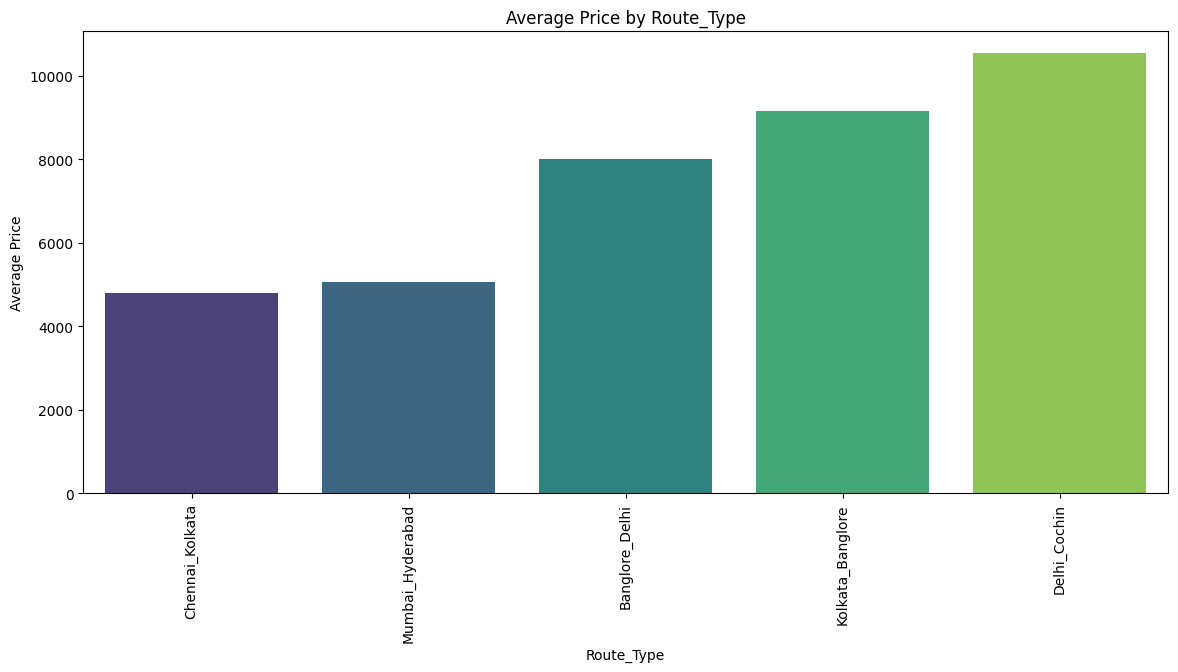

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean price for each route
route_mean_price = final_df.groupby('Route_Type')['Price'].mean().sort_values()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=route_mean_price.index, y=route_mean_price.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Average Price by Route_Type")
plt.xlabel("Route_Type")
plt.ylabel("Average Price")
plt.show()


In [94]:
# Assigning values based on logical distance and observed price trend
route_mapping = {
    'Chennai_Kolkata': 1,            # Closest, least expensive
    'Mumbai_Hyderabad': 2,           # Close, slightly expensive
    'Banglore_Delhi': 3,             # Mid-distance
    'Kolkata_Banglore': 4,           # Distant
    'Delhi_Cochin': 5                # Farthest, most expensive
}

# Map to the final_df
final_df['Route_Type_Encoded'] = final_df['Route_Type'].map(route_mapping)

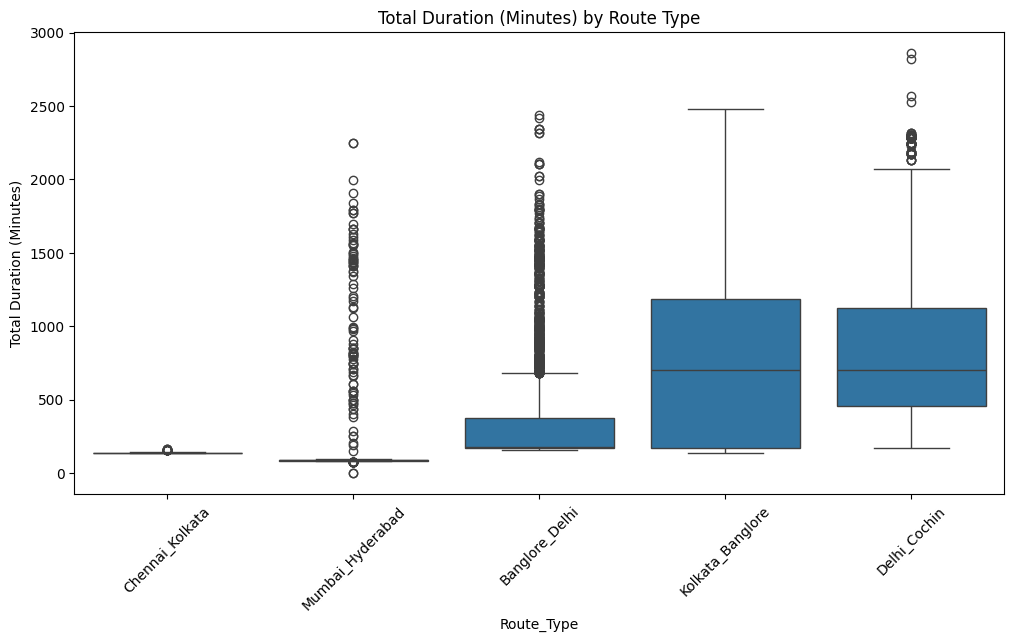

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Route_Type', y='Duration_in_minutes', data=final_df, order=route_mapping.keys())
plt.xticks(rotation=45)
plt.title('Total Duration (Minutes) by Route Type')
plt.ylabel('Total Duration (Minutes)')
plt.show()

In [96]:
final_df.drop(['Route_Type'], axis=1, inplace=True)
final_df.head()

,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_minutes,Airline_Freq,...,No_Info,Meal_Not_Included,No_Baggage,Short_Layover,Long_Layover,Change_Airports,Business_Class,Red_Eye_Flight,Route_Type_Label,Route_Type_Encoded
0,3897.0,24,3,2019,22,20,1,10,170,2564,...,1,0,0,0,0,0,0,0,0,3
1,7662.0,1,5,2019,5,50,13,15,445,2192,...,1,0,0,0,0,0,0,0,3,4
2,13882.0,9,6,2019,9,25,4,25,1140,4746,...,1,0,0,0,0,0,0,0,2,5
3,6218.0,12,5,2019,18,5,23,30,325,2564,...,1,0,0,0,0,0,0,0,3,4
4,13302.0,1,3,2019,16,50,21,35,285,2564,...,1,0,0,0,0,0,0,0,0,3


In [97]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                10683 non-null  float64
 1   Date                 13354 non-null  int64  
 2   Month                13354 non-null  int64  
 3   Year                 13354 non-null  int64  
 4   Dep_hour             13354 non-null  int64  
 5   Dep_min              13354 non-null  int64  
 6   Arrival_hour         13354 non-null  int64  
 7   Arrival_min          13354 non-null  int64  
 8   Duration_in_minutes  13354 non-null  int64  
 9   Airline_Freq         13354 non-null  int64  
 10  Source_Enc           13354 non-null  int64  
 11  Destination_Enc      13354 non-null  int64  
 12  Route_Freq           13354 non-null  int64  
 13  No_Info              13354 non-null  int64  
 14  Meal_Not_Included    13354 non-null  int64  
 15  No_Baggage           13354 non-null 

In [98]:
# Splitting the datasets back to test and train data as preprocessing is over

# Train data (where Price is not null)
train_df = final_df[final_df['Price'].notna()]

# Test data (where Price is null)
test_df = final_df[final_df['Price'].isna()].drop(columns=['Price'])  # Drop target column for test data

In [99]:
# Separate Features (X) and Target (y) for Train
X = train_df.drop(columns=['Price'])  # All columns except target
y = train_df['Price']  # Target column

In [100]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Training the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [102]:
# Evaluating the performance with validation set
y_pred = model.predict(X_valid)
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("R2 Score:", r2_score(y_valid, y_pred))

MAE: 679.9931524522246
R2 Score: 0.8832825696562563


An R² score of 0.883 indicates that the model is explaining a significant portion of the variance in flight prices.

In [103]:
# Making final predictions on Test data
test_preds = model.predict(test_df)

In [104]:
print(f"Shape of Predictions: {test_preds.shape}")
print(f"First 5 Predictions: {test_preds[:5]}")

Shape of Predictions: (2671,)
First 5 Predictions: [14564.3         4230.36       12892.72       13282.23166667
  3684.16      ]


In [113]:
# Adding the predicted prices to the test data and saving the dataframe as a csv file
submission = pd.DataFrame({
    'ID': test_df.index,
    'Price': test_preds
})
submission.to_csv('final_submission.csv', index=False)
print("Submission file saved as final_submission.csv")

Submission file saved as final_submission.csv


In [106]:
# Saving the Random Forest Regressor model as a joblib file
import joblib

# Save the model
joblib.dump(model, 'flight_price_model.joblib')
print("Model saved as flight_price_model.joblib")

Model saved as flight_price_model.joblib
